## NN Adv Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

### Load Data

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [18]:
train = pd.read_csv('/content/gdrive/MyDrive/투빅스/과제/Train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/투빅스/과제/Test.csv')

In [19]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train['label'].nunique() # 라벨은 총 10가지

10

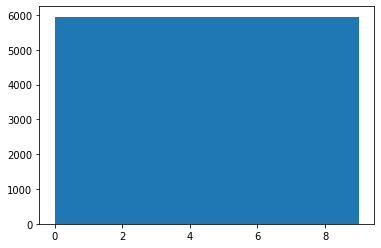

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.hist(train['label'])
plt.show()
# 라벨은 0부터 9까지 균등분포

In [7]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [20]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
X = X.reshape(-1,28,28,1)
#test = test.values.reshape(-1,28,28,1)

## Fashion MNIST DATA

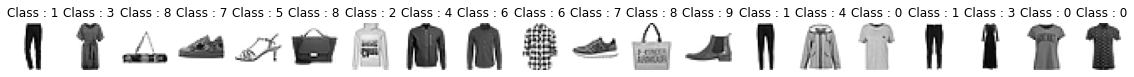

In [22]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [25]:
X_test = test.values
X_test = X_test.reshape(-1,28, 28,1)

y_test = test.iloc[:,0].values


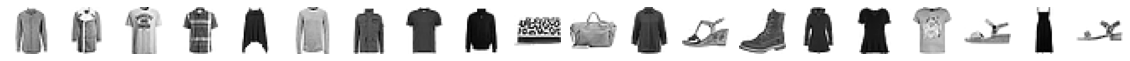

In [24]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split
# 8:2 비율로 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)


In [27]:
X_train.shape, y_train.shape, X_val.shape,y_val.shape


((47600, 28, 28, 1), (47600,), (11900, 28, 28, 1), (11900,))

In [28]:
print("Train set 이미지 수: {} 개".format(X_train.shape[0]))
print("Validation set 이미지 수: {} 개".format(X_val.shape[0]))

Train set 이미지 수: 47600 개
Validation set 이미지 수: 11900 개


In [29]:
# X 데이터 정규화 (0~1의 값으로 만들기)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test / 255.0

In [30]:
# Y : one-hot인코딩
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train)
Y_val = np_utils.to_categorical(y_val)

## Moedel



In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# 컨볼루션 신경망 설정

model = Sequential() 
# model 선언 후 model.add를 이용하여 하나씩 층을 쌓음

model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28,28,1), activation='relu'))
# Convolution층을 쌓는다. 
# 32: 32개의 mask를 사용
# kernel_size: (3,3)의 커널을 정한다.
# input_shape: (28,28,1)
# activation: 활성화 함수를 relu로 정해준다.

model.add(Conv2D(64,(3,3), activation='relu'))
# mask 64를 적용한 새로운 Convolution층을 하나 더 추가한다.

model.add(MaxPooling2D(pool_size=2))
# convolution으로 층을 추가했지만 여전히 크기 때문에 한번 더 축소
# pool_size: pooling창의 크기를 정하는 것으로 2로 정하여 줄여 주었다.

model.add(Dropout(0.25))
# 과적합을 방지하기 위해 dropout

model.add(Flatten())
# convolution과 maxpooling의 2차원 배열을 1차원으로 플래튼

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## Model Compile & Fit

In [33]:
model.compile(loss = 'categorical_crossentropy', # Loss function: cross-entropy
              optimizer='adam', # 최적화 함수는 아담 이용
              metrics = ['accuracy'])

In [36]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
                    epochs=5)

Epoch 1/5
1488/1488 [==============================] - 178s 118ms/step - loss: 0.3313 - accuracy: 0.8816 - val_loss: 0.2455 - val_accuracy: 0.9109
Epoch 2/5
1488/1488 [==============================] - 170s 115ms/step - loss: 0.2736 - accuracy: 0.8994 - val_loss: 0.2257 - val_accuracy: 0.9184
Epoch 3/5
1488/1488 [==============================] - 167s 112ms/step - loss: 0.2417 - accuracy: 0.9109 - val_loss: 0.2150 - val_accuracy: 0.9227
Epoch 4/5
1488/1488 [==============================] - 167s 112ms/step - loss: 0.2164 - accuracy: 0.9208 - val_loss: 0.2213 - val_accuracy: 0.9205
Epoch 5/5
1488/1488 [==============================] - 168s 113ms/step - loss: 0.1986 - accuracy: 0.9255 - val_loss: 0.2174 - val_accuracy: 0.9233


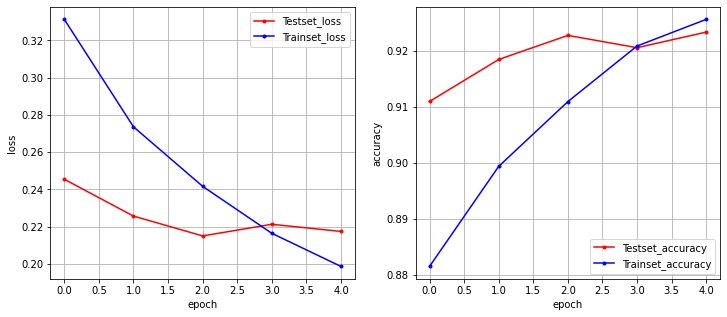

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
ax1.plot(x_len, y_vloss, marker = '.', c="red", label='Testset_loss')
ax1.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
ax1.legend(loc='upper right')
ax1.grid()
ax1.set(xlabel='epoch', ylabel='loss')


# 정확도
y_vaccuracy = history.history['val_accuracy']

# 학습셋
y_accuracy = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_accuracy))
ax2.plot(x_len, y_vaccuracy, marker = '.', c="red", label='Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker = '.', c='blue', label = 'Trainset_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
ax2.legend(loc='lower right')
ax2.grid()

ax2.set(xlabel='epoch', ylabel='accuracy')

# draw gridlines
ax2.grid(True)
plt.show()